# Import Libraries

### pandas
### numpy 
### seaborn 
### matplotlib 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

### Read CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\Orthogonal Matching Pursuit (OMP)/ecommerce_pricing_dataset.csv")

### Explore the Data

In [3]:
df.head()

,Product_Quality,Brand_Popularity,Days_On_Market,Advertising_Spend,Stock_Available,Season_Discount,Num_Reviews,Avg_Review_Score,Price
0,7,97,306,3209.201870,36,10,861,4.85,1588.040048
1,4,60,285,2617.787614,136,15,154,2.51,1073.453855
2,8,43,185,8210.625538,337,0,3494,3.41,3075.706189
3,5,76,39,8810.236948,55,15,904,1.32,3023.019868
4,7,100,223,5301.805634,186,5,1269,3.73,2081.231124


### Check the total Number of rows and columns 

In [4]:
df.shape

(1000, 9)

### Check the Null Values in the data

In [5]:
df.isnull().sum()

Product_Quality      0
Brand_Popularity     0
Days_On_Market       0
Advertising_Spend    0
Stock_Available      0
Season_Discount      0
Num_Reviews          0
Avg_Review_Score     0
Price                0
dtype: int64

### Check the complete information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Quality    1000 non-null   int64  
 1   Brand_Popularity   1000 non-null   int64  
 2   Days_On_Market     1000 non-null   int64  
 3   Advertising_Spend  1000 non-null   float64
 4   Stock_Available    1000 non-null   int64  
 5   Season_Discount    1000 non-null   int64  
 6   Num_Reviews        1000 non-null   int64  
 7   Avg_Review_Score   1000 non-null   float64
 8   Price              1000 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


### Check the stastistical Summary

In [7]:
df.describe()

,Product_Quality,Brand_Popularity,Days_On_Market,Advertising_Spend,Stock_Available,Season_Discount,Num_Reviews,Avg_Review_Score,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.448000,50.362000,178.759000,5117.873584,253.159000,12.795000,2459.967000,3.001410,1903.458727
std,2.912005,29.169055,103.091575,2873.735553,142.277604,8.431136,1435.308666,1.161161,874.120275
min,1.000000,1.000000,1.000000,101.865156,1.000000,0.000000,1.000000,1.020000,128.767230
25%,3.000000,25.000000,92.000000,2606.890663,130.000000,5.000000,1190.500000,1.987500,1152.087852
50%,5.000000,49.000000,168.500000,5300.839617,251.500000,15.000000,2508.500000,2.970000,1937.837206
75%,8.000000,76.000000,267.250000,7623.229361,382.000000,20.000000,3646.250000,4.020000,2653.627046
max,10.000000,100.000000,364.000000,9997.166661,499.000000,25.000000,4994.000000,5.000000,3529.949239


### Check the realtionship between the columns through pairplot 

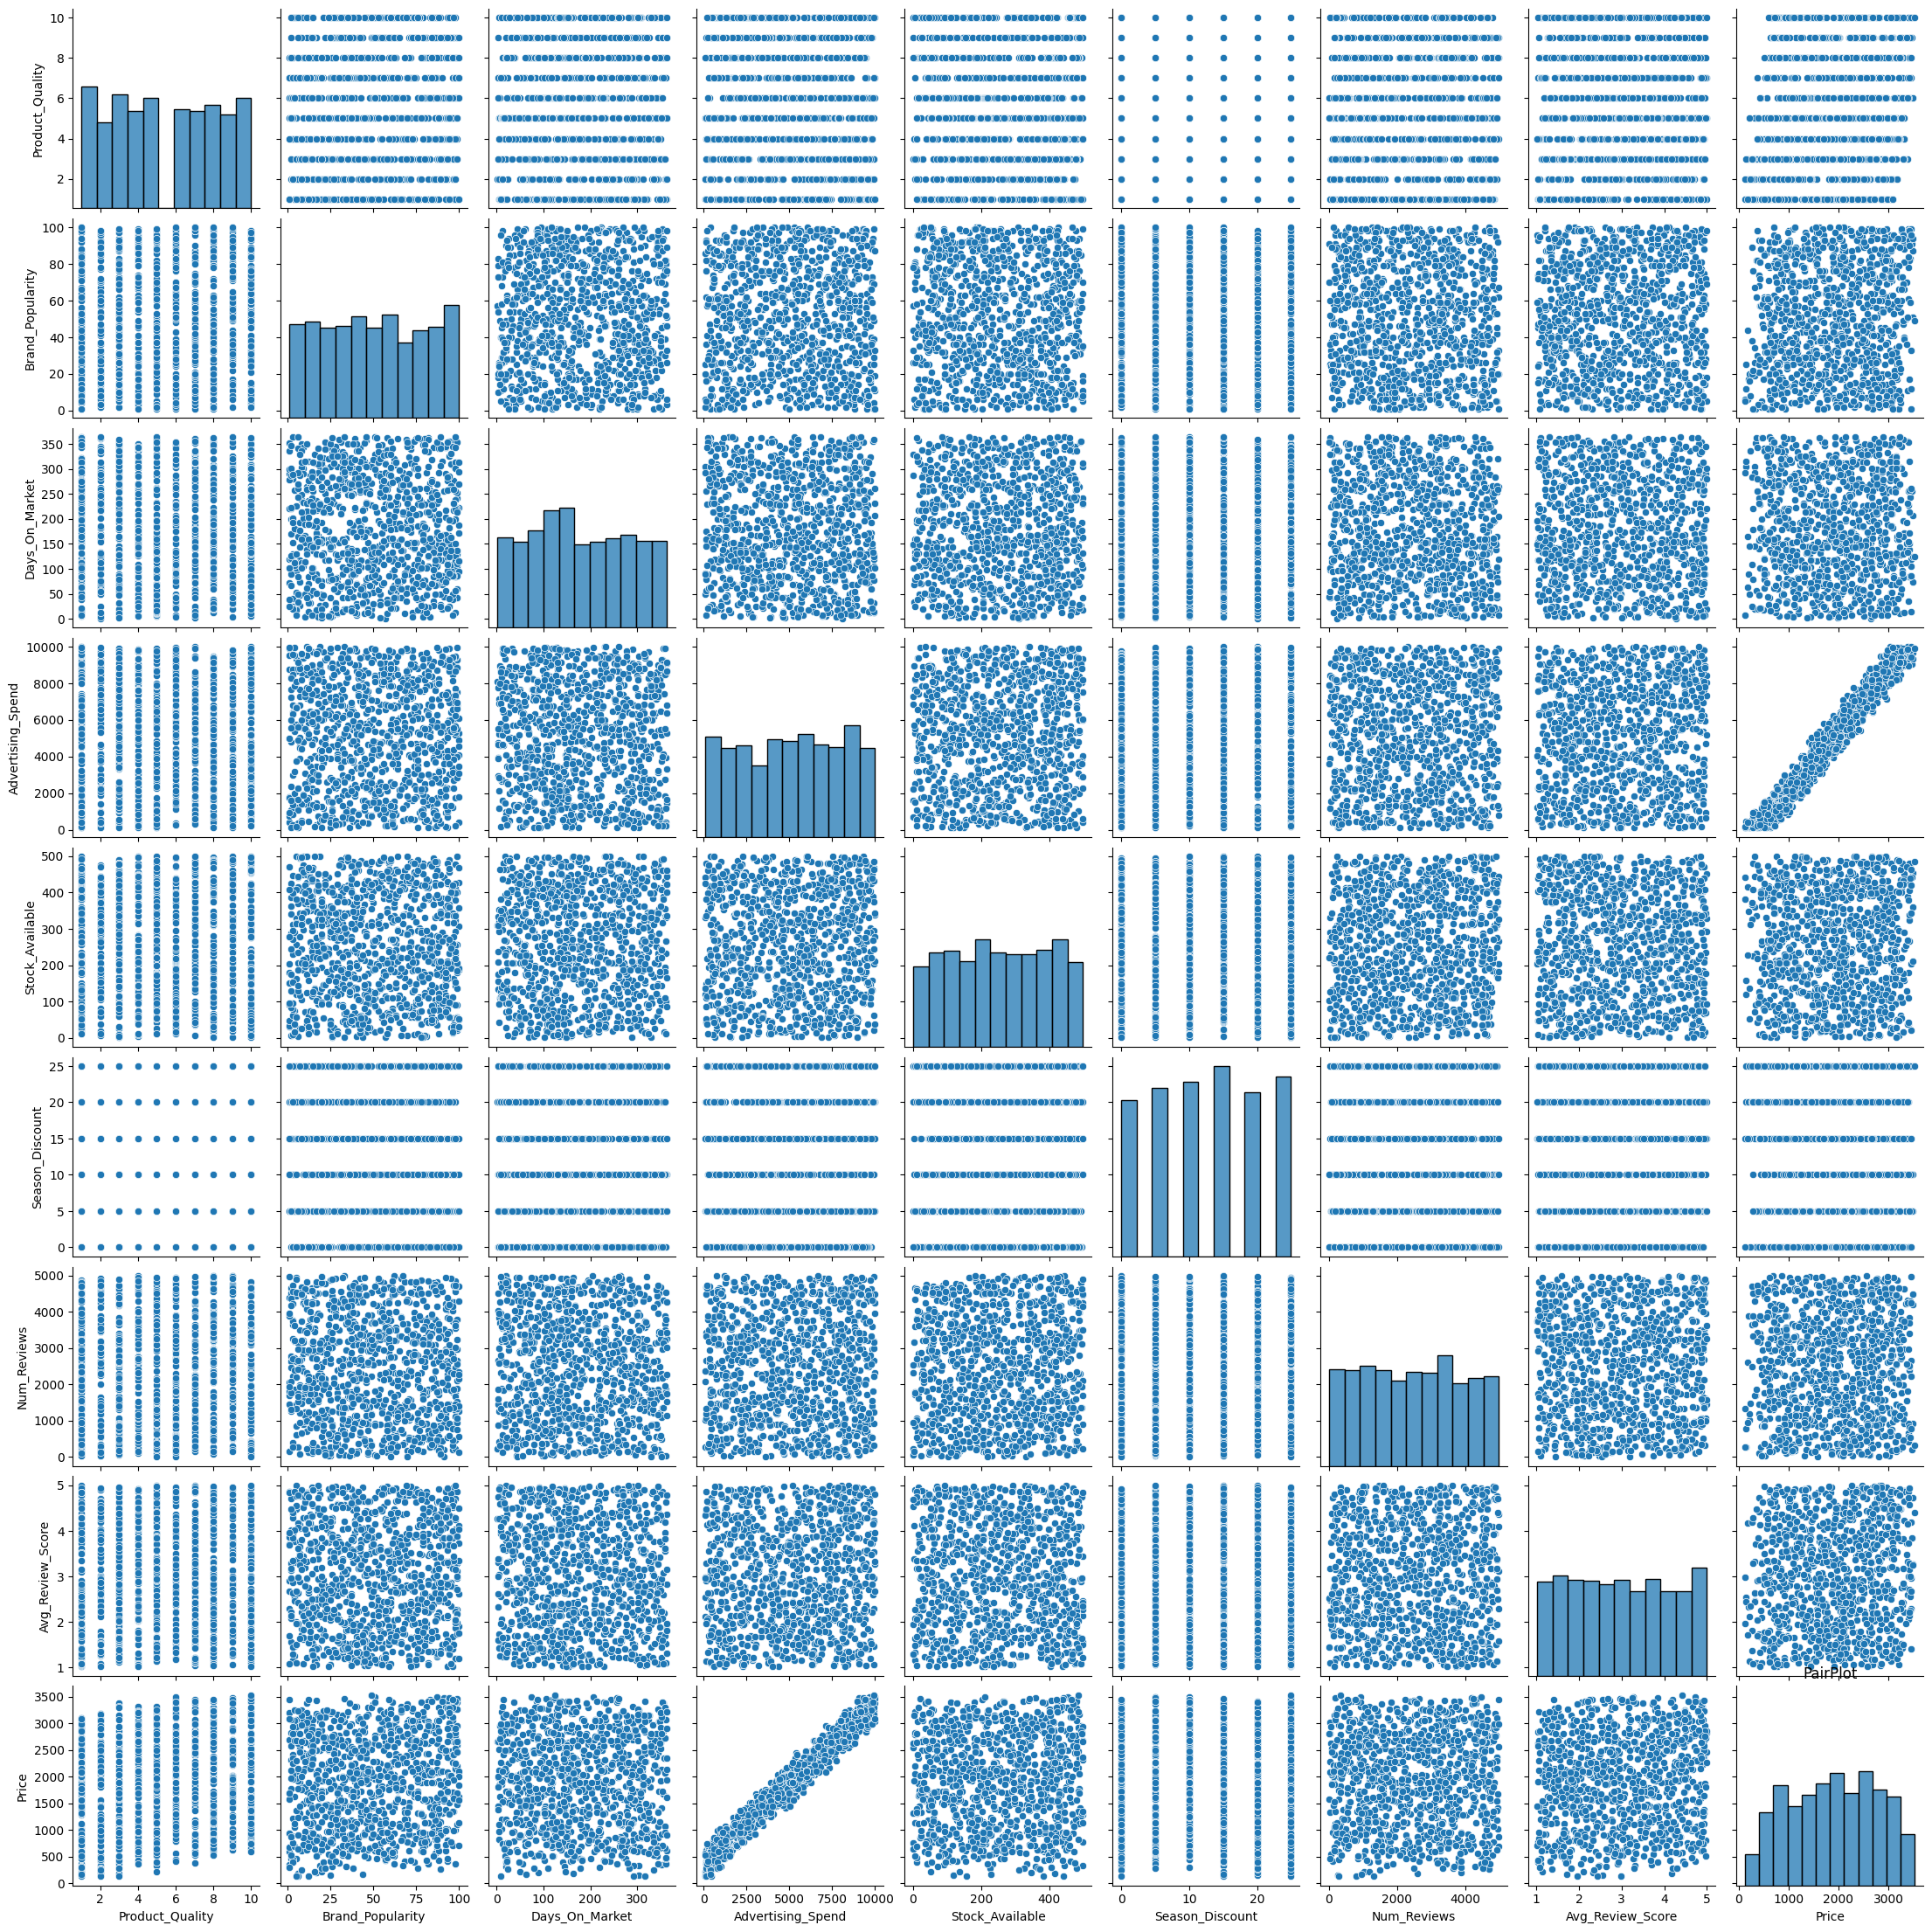

In [8]:
sns.pairplot(data=df)
plt.title("PairPlot")
plt.show()

### Check the co-relation between the columns through (heatmap)

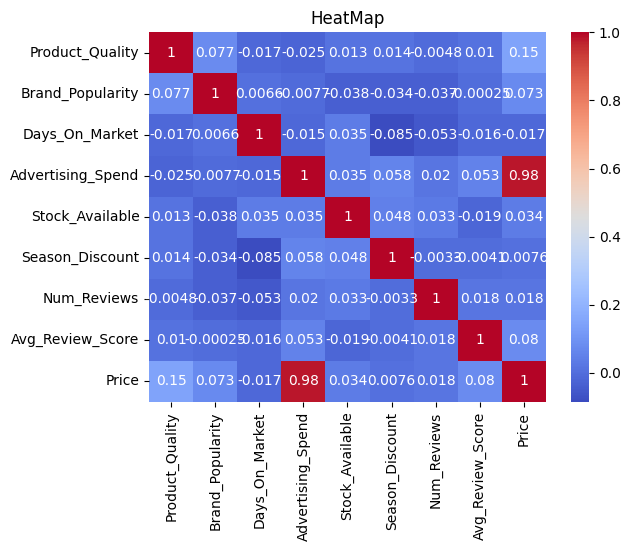

In [9]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("HeatMap")
plt.show()

### The Column Wickets_Taken and Performance_Index have strong positive Relationship
     In heatmap the value 0.88 indicate highly positive relationship between these columns 

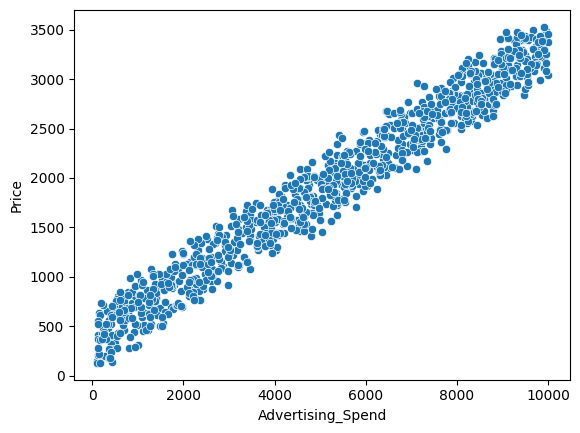

In [10]:
sns.scatterplot(x="Advertising_Spend",y="Price" ,data=df)
plt.show()

### Split the data in x and y (Dependent & Independent varibable)

In [11]:
x = df.iloc[:,:-1]
y = df[["Price"]]

### Import train_test_split from the sklearn (Module model_selection) for split the data into Training and Testing 

In [12]:
from sklearn.model_selection import train_test_split

### Split the data in training and testing 

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Import Machine Learning Model (OrthogonalMatchingPursuit) from sklearn (Module Linear_Model)

In [14]:
from sklearn.linear_model import OrthogonalMatchingPursuit

### Apply / Fit the Model

In [15]:
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5,tol=1e-4,fit_intercept=True,precompute='auto')
omp.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:191: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)


,n_nonzero_coefs,5
,tol,0.0001
,fit_intercept,True
,precompute,'auto'


### Check the score (Accuracy) of the model for check the scanerio of the overfitting (But Our model is not overfit)

In [16]:
omp.score(x_test,y_test)*100,omp.score(x_train,y_train)*100

(99.63867381311528, 99.68385785142839)

### Predict the Value

In [17]:
df["Prediction"] = omp.predict(x)
df.head()

,Product_Quality,Brand_Popularity,Days_On_Market,Advertising_Spend,Stock_Available,Season_Discount,Num_Reviews,Avg_Review_Score,Price,Prediction
0,7,97,306,3209.201870,36,10,861,4.85,1588.040048,1544.901074
1,4,60,285,2617.787614,136,15,154,2.51,1073.453855,1074.188243
2,8,43,185,8210.625538,337,0,3494,3.41,3075.706189,3022.548509
3,5,76,39,8810.236948,55,15,904,1.32,3023.019868,2994.451695
4,7,100,223,5301.805634,186,5,1269,3.73,2081.231124,2188.082385


### Import mean_absolute_error, mean_squared_error, r2_score from sklearn (Module Metrics)
### For Check the overall performance  of the mode 

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Metrics Value 

In [19]:
y_pred = omp.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 40.18
📉 MSE: 2535.77
📉 RMSE: 50.36
🎯 R² Score: 99.64


### Check the overall performance through the visualization 

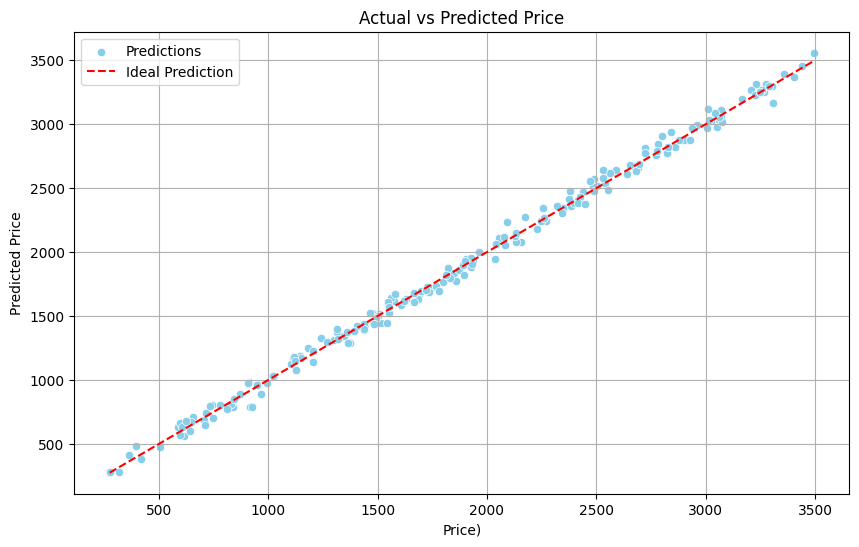

In [20]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Price)")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.grid(True)
plt.show()


## 📌 Conclusion

In this notebook, we successfully implemented an **Orthogonal Matching Pursuit (OMP) Regression model** to predict product-related outcomes using multiple real-world business features. After preprocessing the dataset and splitting it into training and testing sets, we trained the model to achieve **high accuracy and interpretability**.

📈 **Model Performance:**
- **MAE:** 40.18  
- **MSE:** 2535.77  
- **RMSE:** 50.36  
- **R² Score:** 99.64% (Train: 99.64%, Test: 99.68%)  
- The results demonstrate **exceptional predictive performance**, indicating the model's strong ability to capture underlying patterns without overfitting.

🛠 **Next Steps:**
- Perform **hyperparameter tuning** to further optimize the model.
- Experiment with **cross-validation** to validate consistency across different subsets of data.
- Compare OMP performance with **Lasso, Ridge, and ElasticNet** for a holistic evaluation.
- Use **feature importance ranking** to identify and interpret the most impactful predictors.
